In [1]:
import gym.spaces
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

env = gym.make('FrozenLake-v0')

gama = 0.5
epsilon = 0.1
alpha = 0.1

nrEpisodes = 10000

## ACTIONS
nrActions = 4
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

## STATES
nrStates = 4*4

## Random initialization
Q = np.zeros((nrStates,nrActions))

def printPolicy(pi):
    arrows = ["\t←\t", "\t↓\t", "\t→\t", "\t↑\t"]
    size = int(np.sqrt(len(pi)))
    for i in range(size):
        row = "|"
        for j in range(size):
            row += arrows[Pi[i*size+j]] + "|"
        print(row)

Q:
[[  4.61677290e-04   7.60959567e-04   5.94086534e-04   4.84094229e-04]
 [  2.79089848e-04   1.36151205e-03   1.68208441e-03   1.90961811e-03]
 [  7.53579138e-03   5.94568666e-03   5.15809699e-03   1.70767080e-03]
 [  9.41603462e-04   1.40738504e-03   5.33342724e-04   2.08516226e-03]
 [  1.84783715e-03   1.34230778e-03   1.59996185e-03   3.62668627e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.74476702e-02   2.52626395e-02   3.47726231e-02   9.58528982e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.55862526e-03   5.98134350e-03   6.33872065e-03   7.97925223e-03]
 [  2.71866486e-02   3.92585403e-02   4.36905311e-02   1.89986811e-02]
 [  8.97933935e-02   1.10590812e-01   1.33484982e-01   1.08675912e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.91848641e-02   6.41251069e-02   8.32201214e-02   1.06289245e-01]
 [ 

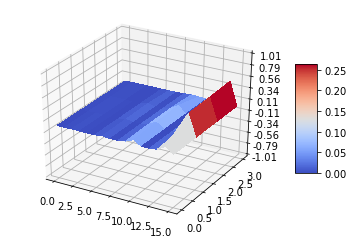

V:
[0.00074238405090863756, 0.0018494639088831259, 0.0072908933848905306, 0.0020008333744165694, 0.0017918728190487346, 0.0, 0.033256397351111612, 0.0, 0.0077277755522375856, 0.042549838009886348, 0.12875490318283583, 0.0, 0.0, 0.10248080423899512, 0.44463262830465777, 0.0]


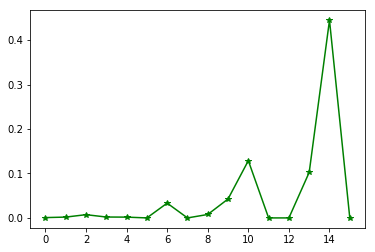

Policy:
[1, 3, 0, 3, 0, 0, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0]
|	↓	|	↑	|	←	|	↑	|
|	←	|	←	|	→	|	←	|
|	↑	|	→	|	→	|	←	|
|	←	|	↑	|	↑	|	←	|
Episode avg. length:  7.6693


In [2]:
def egreedyAction(s):
    return np.argmax(Q[s,:]) if np.random.rand(0,1)>epsilon else env.action_space.sample()
 
def V(s):
    return (1-epsilon) * np.max(Q[s,:]) + epsilon * np.mean(Q[s,:])

episodeAccumLen = 0
for e in range(nrEpisodes):
    env.reset()
    #env.render()
    s = 0
    a = egreedyAction(s)
    terminated = False
    while not terminated:
        nextS, R, terminated, debug_info = env.step(a)
        #env.render()
        nextA = egreedyAction(nextS)
        Q[s,a] = Q[s,a] + alpha * (R + gama * np.max(Q[nextS, :]) - Q[s,a])
        s = nextS
        a = nextA
        episodeAccumLen += 1
    #env.render()
    #print("End of episode")

V = [V(s) for s in range(nrStates)]
Pi = [np.argmax(Q[s,:]) for s in range(nrStates)]

print("Q:")
print(Q)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.

X = [i for i in range(nrStates)]
Y = [i for i in range(nrActions)]
X, Y = np.meshgrid(X, Y)
Z = Q[X,Y]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

print("V:")
print(V)

figure()
plot([i for i in range(nrStates)], V, 'g*-')
show()

print("Policy:")
print(Pi)
printPolicy(Pi)
            
print("Episode avg. length: ", episodeAccumLen/nrEpisodes)

        